<a href="https://colab.research.google.com/github/Foulach/project_an/blob/main/regression4_region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Les différences avec le dernier modèle :
*  Nous transformons la “région” en variable.
*  Nous avons donc 9 nouvelles variables: region_commonwealth of independent states, region_east asia, region_latin america and caribbean, region_middle east and north africa, region_north america and anz, region_south asia, region_southeast asia, region_sub-saharan africa, region_western europe.






## Data import and cleaning

In [ ]:
# import the dataset from google drive

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/happiness_project/regressions/merged_df.csv')
df.head()

Mounted at /content/drive


,year,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,id,average monthly earnings,population_density,unemployment rate,weekly hours worked,maternity leave duration
0,2015,switzerland,western europe,7.587,84231.63,1.34951,0.94143,0.66557,0.29678,0.41978,switzerland_2015,5966.104,209.668880,4.801,36.22,0.0
1,2015,iceland,western europe,7.561,53227.63,1.40223,0.94784,0.62877,0.43630,0.14145,iceland_2015,4692.284,3.282376,3.979,38.92,0.0
2,2015,denmark,western europe,7.527,53478.50,1.36058,0.87464,0.64938,0.34139,0.48357,denmark_2015,4931.349,142.092450,6.278,32.67,0.0
3,2015,norway,western europe,7.522,74568.14,1.33095,0.88521,0.66973,0.34699,0.36503,norway_2015,5282.629,14.247059,4.296,34.3,91.0
4,2015,canada,north america and anz,7.427,43628.43,1.32261,0.90563,0.63297,0.45811,0.32957,canada_2015,3212.450,4.091872,6.945,35.55,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          1152 non-null   int64  
 1   country                       1152 non-null   object 
 2   region                        1152 non-null   object 
 3   happiness_score               1152 non-null   float64
 4   gdp_per_capita                1152 non-null   float64
 5   social_support                1152 non-null   float64
 6   healthy_life_expectancy       1152 non-null   float64
 7   freedom_to_make_life_choices  1152 non-null   float64
 8   generosity                    1152 non-null   float64
 9   perceptions_of_corruption     1152 non-null   float64
 10  id                            1152 non-null   object 
 11  average monthly earnings      696 non-null    float64
 12  population_density            1152 non-null   float64
 13  une

## Modeling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Encodage One-Hot de la colonne 'region'
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)



In [ ]:
# convert bool to numeric data

# Convert boolean columns to numeric (assuming you have boolean columns)
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       1152 non-null   int64  
 1   country                                    1152 non-null   object 
 2   happiness_score                            1152 non-null   float64
 3   gdp_per_capita                             1152 non-null   float64
 4   social_support                             1152 non-null   float64
 5   healthy_life_expectancy                    1152 non-null   float64
 6   freedom_to_make_life_choices               1152 non-null   float64
 7   generosity                                 1152 non-null   float64
 8   perceptions_of_corruption                  1152 non-null   float64
 9   id                                         1152 non-null   object 
 10  average monthly earnings

In [ ]:
df_encoded.head()

,year,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,id,...,maternity leave duration,region_commonwealth of independent states,region_east asia,region_latin america and caribbean,region_middle east and north africa,region_north america and anz,region_south asia,region_southeast asia,region_sub-saharan africa,region_western europe
0,2015,switzerland,7.587,84231.63,1.34951,0.94143,0.66557,0.29678,0.41978,switzerland_2015,...,0.0,0,0,0,0,0,0,0,0,1
1,2015,iceland,7.561,53227.63,1.40223,0.94784,0.62877,0.43630,0.14145,iceland_2015,...,0.0,0,0,0,0,0,0,0,0,1
2,2015,denmark,7.527,53478.50,1.36058,0.87464,0.64938,0.34139,0.48357,denmark_2015,...,0.0,0,0,0,0,0,0,0,0,1
3,2015,norway,7.522,74568.14,1.33095,0.88521,0.66973,0.34699,0.36503,norway_2015,...,91.0,0,0,0,0,0,0,0,0,1
4,2015,canada,7.427,43628.43,1.32261,0.90563,0.63297,0.45811,0.32957,canada_2015,...,0.0,0,0,0,0,1,0,0,0,0


In [ ]:
# Liste des colonnes à inclure dans les features (X) après l'encodage
features_to_include = [
    'gdp_per_capita',
    'social_support',
    'healthy_life_expectancy',
    'freedom_to_make_life_choices',
    'generosity',
    'perceptions_of_corruption',
    'population_density'
]

# Ajout des colonnes encodées de la région aux features
region_columns = [col for col in df_encoded.columns if 'region_' in col]
features_to_include.extend(region_columns)

# Sélection des features (X)
X = df_encoded[features_to_include]

# Variable cible (y)
y = df_encoded['happiness_score']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

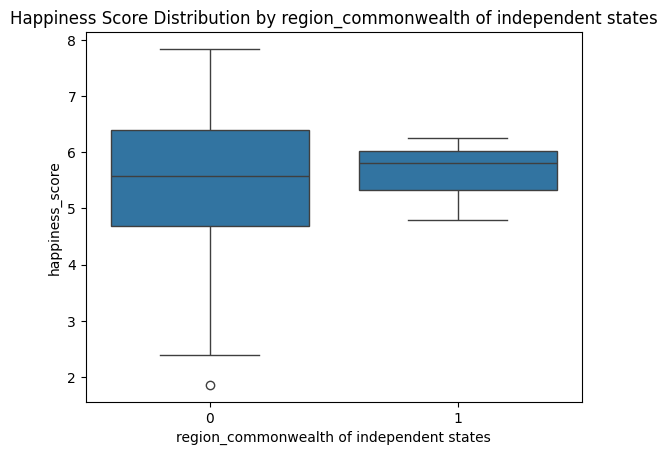

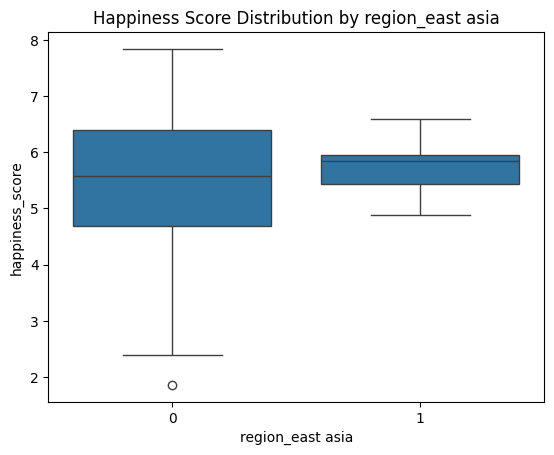

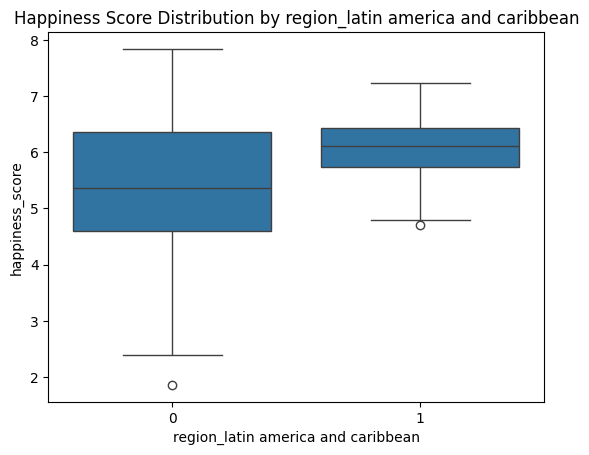

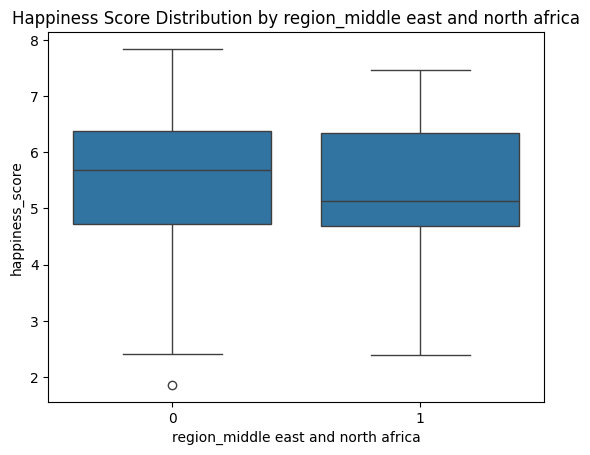

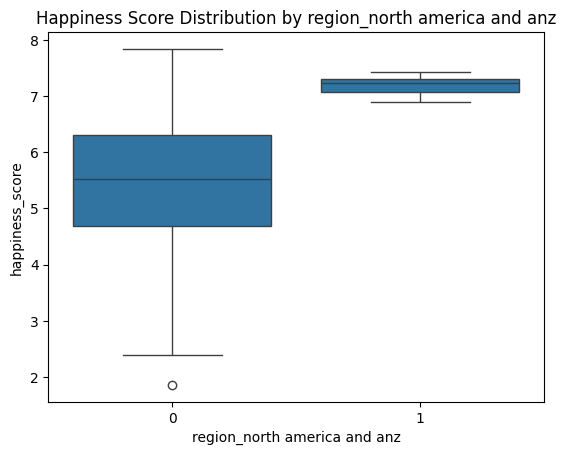

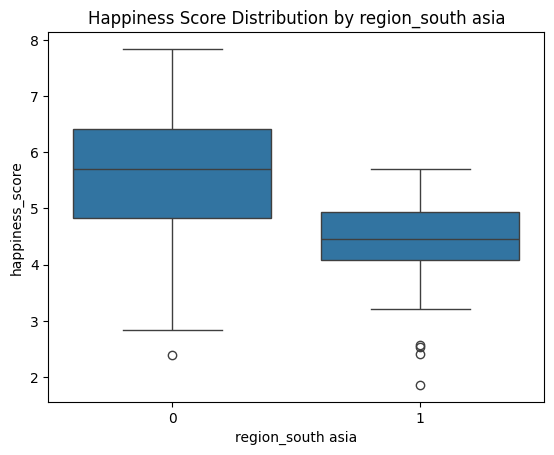

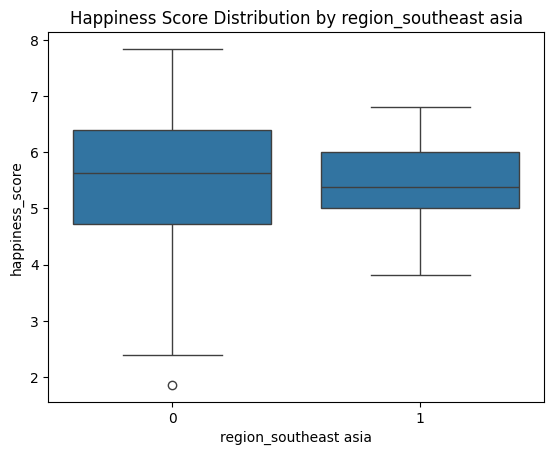

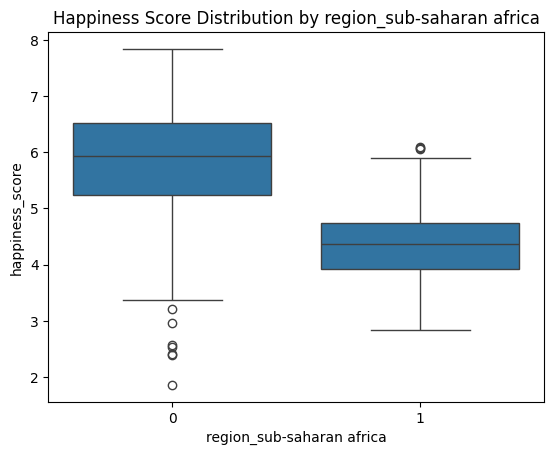

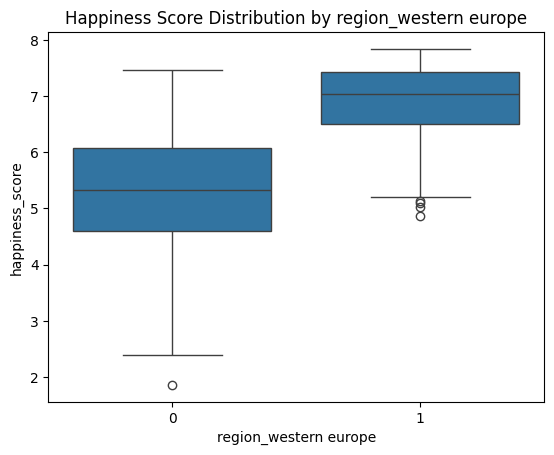

In [ ]:
# prompt: visualize les region_columns

import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation des colonnes de région
for col in region_columns:
    plt.figure()
    sns.boxplot(x=df_encoded[col], y=df_encoded['happiness_score'])
    plt.title(f"Happiness Score Distribution by {col}")
    plt.show()


### Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared: 0.782356522950409
Mean Squared Error: 0.23566788275383507
Mean Absolute Error: 0.37475613304150296


## Coefficients et leur interprétation

In [ ]:
# Obtenir les coefficients du modèle
coefficients = model.coef_
intercept = model.intercept_

# Afficher les coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Associer les coefficients aux noms des colonnes pour une interprétation plus facile
for name, coef in zip(X.columns, coefficients):
    print(f"{name}: {coef}")

Intercept: 5.553365037648209
Coefficients: [ 0.3966453   0.17694152  0.1447201   0.21071409  0.04802061  0.05913849
 -0.07252427 -0.00457234 -0.03942475  0.13112697 -0.03210098  0.02762652
 -0.1520177  -0.09869649 -0.27795021  0.02185157]
gdp_per_capita: 0.3966453039679082
social_support: 0.17694152147604608
healthy_life_expectancy: 0.144720102267797
freedom_to_make_life_choices: 0.2107140916515199
generosity: 0.0480206065227542
perceptions_of_corruption: 0.05913848639137949
population_density: -0.07252427017671595
region_commonwealth of independent states: -0.004572339787700268
region_east asia: -0.03942474500858124
region_latin america and caribbean: 0.13112696678009061
region_middle east and north africa: -0.0321009797702695
region_north america and anz: 0.027626524589669924
region_south asia: -0.15201770353637611
region_southeast asia: -0.09869649213843207
region_sub-saharan africa: -0.27795020963056216
region_western europe: 0.021851566642189235


## Variance Inflation Factor (VIF)

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Utiliser les mêmes données que pour la régression linéaire
X = df_encoded[[
    'gdp_per_capita',
    'social_support',
    'healthy_life_expectancy',
    'freedom_to_make_life_choices',
    'generosity',
    'perceptions_of_corruption',
    'population_density',
    'region_commonwealth of independent states',
    'region_east asia',
    'region_latin america and caribbean',
    'region_middle east and north africa',
    'region_north america and anz',
    'region_south asia',
    'region_southeast asia',
    'region_sub-saharan africa',
    'region_western europe'
]]

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Afficher les résultats
print(vif_data)

                                      feature        VIF
0                                       const  51.338284
1                              gdp_per_capita   4.732481
2                              social_support   1.869592
3                     healthy_life_expectancy   3.076760
4                freedom_to_make_life_choices   1.759863
5                                  generosity   1.381531
6                   perceptions_of_corruption   2.770407
7                          population_density   1.607853
8   region_commonwealth of independent states   1.326223
9                            region_east asia   1.350570
10         region_latin america and caribbean   1.771003
11        region_middle east and north africa   1.558008
12               region_north america and anz   1.720140
13                          region_south asia   1.520720
14                      region_southeast asia   1.792698
15                  region_sub-saharan africa   3.284460
16                      region_


# RANSAC MODEL

In [ ]:
# Importer les bibliothèques nécessaires
import numpy as np
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Initialisation du modèle de régression linéaire et du modèle RANSAC
linear_model = LinearRegression()
ransac = RANSACRegressor(estimator=linear_model,
                         min_samples=0.9,        # Nombre minimum d'échantillons pour ajuster le modèle
                         max_trials=100)         # Nombre maximum d'itérations pour trouver un bon modèle

# Entraînement du modèle RANSAC
ransac.fit(X, y)

# Obtenir les prédictions et afficher les coefficients du modèle
y_pred = ransac.predict(X)

# Afficher les coefficients et l'intercept
print(f"Intercept: {ransac.estimator_.intercept_}")
print(f"Coefficients: {ransac.estimator_.coef_}")

# Associer les coefficients aux noms des colonnes pour une interprétation plus facile
for name, coef in zip(X.columns, ransac.estimator_.coef_):
    print(f"{name}: {coef}")

# Évaluer les performances du modèle
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

# Identifier les inliers et outliers
inlier_mask = ransac.inlier_mask_  # Masque des inliers
outlier_mask = np.logical_not(inlier_mask)  # Masque des outliers

# Affichage des inliers et outliers
print(f"Nombre d'inliers: {np.sum(inlier_mask)}")
print(f"Nombre d'outliers: {np.sum(outlier_mask)}")

Intercept: 3.6795868595180363
Coefficients: [ 0.00000000e+00  1.86333708e-05  5.32812858e-01  5.67699733e-01
  1.60368365e+00  3.40075898e-01  3.59375810e-01 -9.53673564e-05
 -7.61685055e-02 -2.20735929e-01  3.22031794e-01 -1.11866263e-01
  1.14756661e-01 -7.95749947e-01 -3.49424303e-01 -6.11992587e-01
  7.38961156e-02]
const: 0.0
gdp_per_capita: 1.8633370789195425e-05
social_support: 0.5328128584660254
healthy_life_expectancy: 0.5676997327004568
freedom_to_make_life_choices: 1.6036836521275861
generosity: 0.3400758977440848
perceptions_of_corruption: 0.3593758095438699
population_density: -9.536735635415846e-05
region_commonwealth of independent states: -0.0761685055404404
region_east asia: -0.22073592900918365
region_latin america and caribbean: 0.3220317936710981
region_middle east and north africa: -0.11186626303601215
region_north america and anz: 0.11475666076408855
region_south asia: -0.7957499466982788
region_southeast asia: -0.3494243026794157
region_sub-saharan africa: -0.611

In [ ]:
# Check how many unique "country" values there are in each "region"

region_country_counts = df.groupby('region')['country'].nunique()

# Print the results
print(region_country_counts)


region
central and eastern europe            22
commonwealth of independent states     4
east asia                              6
latin america and caribbean           19
middle east and north africa          13
north america and anz                  4
south asia                             6
southeast asia                         8
sub-saharan africa                    27
western europe                        19
Name: country, dtype: int64


In [ ]:
df.shape

(1152, 16)

In [ ]:
# Check which 'country' values are in 'region' latin america and caribbean

# Filter the DataFrame for the 'Latin America and Caribbean' region
latin_america_df = df[df['region'] == 'latin america and caribbean']

# Get the unique 'country' values in this region
latin_america_countries = latin_america_df['country'].unique()

# Print the result
print(latin_america_countries)


['costa rica' 'mexico' 'brazil' 'venezuela' 'panama' 'chile' 'argentina'
 'uruguay' 'colombia' 'el salvador' 'guatemala' 'ecuador' 'bolivia'
 'paraguay' 'nicaragua' 'peru' 'jamaica' 'dominican republic' 'honduras']


In [ ]:
df.groupby('region')['happiness_score'].median().sort_values(ascending=False)

,happiness_score
region,
north america and anz,7.22540
western europe,7.03400
latin america and caribbean,6.10500
east asia,5.83650
commonwealth of independent states,5.81400
central and eastern europe,5.65450
southeast asia,5.38415
middle east and north africa,5.13180
south asia,4.46350
